# Preprocessing Model
The main goals of this model is to classify project_description and project_school_name into its own coloumns
# Questions to ask?
Where are all these cities from new york? -> note we have ageograhpc location dummy!
If the new data has cities outisde of new york how to handle?
If the current/new data has mispelling how to handle (probabilisitc method?)

# Supervised Learning : NPL
We first create a tokeniser and then identify throuhg a school_type_dict to automate manual labelling. we find X000 - BRONX, M000 - MANHATTAN, K000 - BROOKLYN, NEW BRIDGES, Q000 - QUEENS, K000 - BROOKLYN  problamatic labels. We assume each is either a k-12 school 
Next we create a neural network for future unlablled datasets to classify project_school_name into a cateogry of {Pre-School, Primary/Hihg/Middle school, University, Admisnitrative}.


In [9]:
import pandas as pd

df = pd.read_csv('/Users/shahid/Github/data-society-ibm-ml-project/data/interim/data_removed_missing_values_null_na_illogical_date.csv')

In [10]:
import pandas as pd

# List of cities in New York
cities = [
    'Accord', 'Adams Center', 'Adams', 'Addison', 'Afton', 'Akron', 'Albany', 'Albertson', 'Albion', 'Alden', 'Alexander', 
    'Alexandria Bay', 'Alfred', 'Allegany', 'Allentown', 'Alma', 'Almond', 'Altamont', 'Altmar', 'Altona', 
    'Amagansett', 'Amenia', 'Amityville', 'Amsterdam', 'Ancram', 'Andes', 'Andover', 'Angelica', 'Angola', 'Antwerp', 
    'Apalachin', 'Aquebogue', 'Arcade', 'Ardsley', 'Argyle', 'Arkport', 'Armonk', 'Ashland', 'Athens', 'Atlantic Beach', 
    'Attica', 'Au Sable Forks', 'Auburn', 'Aurora', 'Austerlitz', 'Ava', 'Averill Park', 'Avoca', 'Avon', 'Babylon', 
    'Bainbridge', 'Baldwin', 'Baldwinsville', 'Ballston Lake', 'Ballston Spa', 'Barker', 'Barneveld', 'Barton', 'Batavia', 
    'Bath', 'Bay Shore', 'Bayport', 'Bayville', 'Beacon', 'Bedford', 'Belfast', 'Bellerose', 'Bellmore', 'Bellport', 
    'Belmont', 'Bemus Point', 'Bergen', 'Berkshire', 'Berlin', 'Berne', 'Bethel', 'Bethpage', 'Big Flats', 'Binghamton', 
    'Black River', 'Blauvelt', 'Bloomfield', 'Blooming Grove', 'Bloomingburg', 'Blue Point', 'Bohemia', 'Bolivar', 
    'Bolton Landing', 'Bombay', 'Boonville', 'Boston', 'Bovina Center', 'Bradford', 'Brant', 'Brasher Falls', 'Brentwood', 
    'Brewerton', 'Brewster', 'Briarcliff Manor', 'Bridgehampton', 'Bridgeport', 'Bridgewater', 'Brightwaters', 'Broadalbin', 
    'Brockport', 'Brocton', 'Bronxville', 'Brookfield', 'Brookhaven', 'Brownville', 'Brushton', 'Buchanan', 'Buffalo', 
    'Burdett', 'Burke', 'Burlington Flats', 'Byron', 'Cairo', 'Calcium', 'Caledonia', 'Callicoon', 'Calverton', 
    'Cambria Heights', 'Cambridge', 'Camden', 'Cameron', 'Camillus', 'Campbell', 'Canaan', 'Canajoharie', 'Canandaigua', 
    'Canaseraga', 'Canastota', 'Candor', 'Caneadea', 'Canisteo', 'Canton', 'Cape Vincent', 'Carle Place', 'Carlisle', 
    'Carmel', 'Caroga Lake', 'Carthage', 'Cassadaga', 'Castile', 'Castleton On Hudson', 'Castorland', 'Cato', 'Catskill', 
    'Cattaraugus', 'Cayuga', 'Cayuta', 'Cazenovia', 'Cedarhurst', 'Celoron', 'Center Moriches', 'Centereach', 'Centerport', 
    'Centerville', 'Central Islip', 'Central Square', 'Central Valley', 'Champlain', 'Chappaqua', 'Charlotteville', 
    'Chateaugay', 'Chatham', 'Chaumont', 'Chautauqua', 'Chazy', 'Chemung', 'Chenango Bridge', 'Chenango Forks', 
    'Cherry Creek', 'Cherry Valley', 'Chester', 'Chittenango', 'Churchville', 'Cicero', 'Cincinnatus', 'Clarence Center', 
    'Clarence', 'Clarendon', 'Clark Mills', 'Clarkson', 'Clarksville', 'Claverack', 'Clay', 'Clayton', 'Clayville', 
    'Cleveland', 'Clifton Park', 'Clifton Springs', 'Clinton', 'Clintondale', 'Clyde', 'Clymer', 'Cobleskill', 'Cochecton', 
    'Coeymans', 'Cohocton', 'Cohoes', 'Cold Brook', 'Cold Spring Harbor', 'Cold Spring', 'Colden', 'Collins', 'Colton', 
    'Commack', 'Conesus', 'Conewango Valley', 'Congers', 'Conklin', 'Constable', 'Constableville', 'Constantia', 
    'Cooperstown', 'Copake', 'Copenhagen', 'Copiague', 'Coram', 'Corfu', 'Corinth', 'Corning', 'Cornwall On Hudson', 
    'Cornwall', 'Cortland', 'Cortlandt Manor', 'Coxsackie', 'Cragsmoor', 'Croghan', 'Crompond', 'Croton On Hudson', 
    'Crown Point', 'Cuba', 'Cutchogue', 'Dannemora', 'Dansville', 'Darien Center', 'Davenport', 'Dayton', 'De Kalb Junction', 
    'De Peyster', 'De Ruyter', 'Deer Park', 'Deferiet', 'Delanson', 'Delevan', 'Delhi', 'Delmar', 'Denmark', 'Depauville', 
    'Depew', 'Deposit', 'Dexter', 'Dickinson Center', 'Dobbs Ferry', 'Dolgeville', 'Dover Plains', 'Dresden', 'Dryden', 
    'Duanesburg', 'Dundee', 'Dunkirk', 'Durham', 'Eagle Bay', 'Eagle Bridge', 'Earlville', 'East Aurora', 'East Bloomfield', 
    'East Greenbush', 'East Hampton', 'East Islip', 'East Marion', 'East Meadow', 'East Moriches', 'East Nassau', 
    'East Northport', 'East Norwich', 'East Otto', 'East Quogue', 'East Randolph', 'East Rochester', 'East Rockaway', 
    'East Syracuse', 'East Williamson', 'Eastchester', 'Eastport', 'Eaton', 'Eden', 'Edmeston', 'Edwards', 'Elba', 'Elbridge', 
    'Elizabethtown', 'Ellenburg', 'Ellenville', 'Ellicottville', 'Ellington', 'Ellisburg', 'Elma', 'Elmira', 'Elmont', 
    'Elmsford', 'Endicott', 'Endwell', 'Erin', 'Esopus', 'Esperance', 'Essex', 'Evans Mills', 'Fabius', 'Fair Haven', 
    'Fairport', 'Falconer', 'Fallsburg', 'Farmingdale', 'Farmington', 'Farmingville', 'Farnham', 'Fayette', 'Fayetteville', 
    'Fine', 'Fishers Island', 'Fishkill', 'Fleischmanns', 'Floral Park', 'Florida', 'Fonda', 'Forestburgh', 'Forestport', 
    'Forestville', 'Fort Ann', 'Fort Covington', 'Fort Drum', 'Fort Edward', 'Fort Johnson', 'Fort Montgomery', 'Fort Plain', 
    'Frankfort', 'Franklin Square', 'Franklin', 'Franklinville', 'Fredonia', 'Freedom', 'Freeport', 'Freeville', 
    'Fremont Center', 'Frewsburg', 'Friendship', 'Fulton', 'Fultonville', 'Gainesville', 'Galway', 'Garden City', 'Gardiner', 
    'Gasport', 'Geneseo', 'Geneva', 'Genoa', 'Georgetown', 'Germantown', 'Gerry', 'Ghent', 'Gilbertsville', 'Gilboa', 
    'Glasco', 'Glen Cove', 'Glen Head', 'Glens Falls', 'Glenwood Landing', 'Gloversville', 'Gorham', 'Goshen', 'Gouverneur', 
    'Gowanda', 'Grafton', 'Grand Island', 'Granville', 'Great Bend', 'Great Neck', 'Great River', 'Great Valley', 'Greene', 
    'Greenfield Center', 'Greenlawn', 'Greenport', 'Greenvale', 'Greenville', 'Greenwich', 'Greenwood Lake', 'Greenwood', 
    'Greig', 'Groton', 'Groveland', 'Guilderland', 'Guilford', 'Hadley', 'Hagaman', 'Hague', 'Hamburg', 'Hamden', 'Hamilton', 
    'Hamlin', 'Hammond', 'Hammondsport', 'Hampton Bays', 'Hampton', 'Hancock', 'Hannibal', 'Harford', "Harpersfield", "Harriman", "Harris", "Harrison", "Harrisville", 
    "Hartford", "Hartsdale", "Hartwick", "Hastings On Hudson", "Hastings", 
    "Hauppauge", "Haverstraw", "Hawthorne", "Hector", "Hempstead", 
    "Henderson", "Henrietta", "Herkimer", "Hermon", "Heuvelton", 
    "Hewlett", "Hicksville", "High Falls", "Highland Falls", "Highland Mills", 
    "Highland", "Hillburn", "Hillsdale", "Hilton", "Hinsdale", 
    "Hobart", "Holbrook", "Holland Patent", "Holland", "Holley", 
    "Holtsville", "Homer", "Honeoye Falls", "Hoosick Falls", "Hoosick", 
    "Hopewell Junction", "Hornell", "Horseheads", "Houghton", "Howard Beach", 
    "Hudson Falls", "Hudson", "Hume", "Hunter", "Huntington Station", 
    "Huntington", "Hurley", "Hyde Park", "Ilion", "Indian Lake", 
    "Inlet", "Interlaken", "Inwood", "Irvington", "Island Park", 
    "Islandia", "Islip Terrace", "Islip", "Ithaca", "Jackson Heights", 
    "Jamesport", "Jamestown", "Jasper", "Java Center", "Jay", 
    "Jefferson Valley", "Jefferson", "Jeffersonville", "Jericho", "Jewett", 
    "Johnsburg", "Johnson City", "Johnstown", "Jordan", "Keene", 
    "Keeseville", "Kendall", "Kent", "Kerhonkson", "Kinderhook", 
    "Kings Park", "Kingston", "Kirkwood", "Knox", "La Fargeville", 
    "La Fayette", "Lacona", "Lake George", "Lake Grove", "Lake Katrine", 
    "Lake Luzerne", "Lake Placid", "Lake Pleasant", "Lake View", "Lakewood", 
    "Lancaster", "Lansing", "Larchmont", "Laurel", "Laurens", 
    "Lawrence", "Le Roy", "Lee Center", "Leeds", "Leicester", 
    "Leon", "Levittown", "Lewis", "Lewiston", "Lexington", 
    "Liberty", "Lima", "Limestone", "Lincolndale", "Lindenhurst", 
    "Lindley", "Lisbon", "Lisle", "Little Falls", "Little Valley", 
    "Liverpool", "Livingston Manor", "Livingston", "Livonia", "Locke", 
    "Lockport", "Locust Valley", "Lodi", "Long Beach", "Long Lake", 
    "Lorraine", "Lowville", "Lynbrook", "Lyndonville", "Lyon Mountain", 
    "Lyons Falls", "Lyons", "Macedon", "Machias", "Madison", 
    "Madrid", "Mahopac", "Maine", "Malden Bridge", "Malone", 
    "Malverne", "Mamaroneck", "Manchester", "Manhasset", "Manlius", 
    "Mannsville", "Manorville", "Marathon", "Marcellus", "Marcy", 
    "Margaretville", "Marilla", "Marion", "Marlboro", "Martinsburg", 
    "Maryland", "Masonville", "Massapequa Park", "Massapequa", "Massena", 
    "Mastic Beach", "Mastic", "Mattituck", "Maybrook", "Mayfield", 
    "Mayville", "Mc Donough", "Mc Graw", "Mechanicville", "Medford", 
    "Medina", "Medusa", "Melrose", "Melville", "Mendon", 
    "Meridian", "Merrick", "Mexico", "Mid Island", "Middleburgh", 
    "Middleport", "Middlesex", "Middletown", "Middleville", "Milford", 
    "Mill Neck", "Millbrook", "Miller Place", "Millerton", "Millport", 
    "Milton", "Mineola", "Minerva", "Minetto", "Mineville", 
    "Minoa", "Mohawk", "Moira", "Monroe", "Monsey", 
    "Montauk", "Montezuma", "Montgomery", "Monticello", "Montour Falls", 
    "Mooers", "Moravia", "Moriah", "Moriches", "Morris", 
    "Morrisonville", "Morristown", "Morrisville", "Mount Kisco", "Mount Morris", 
    "Mount Sinai", "Mount Vernon", "Munnsville", "Nanuet", "Napanoch", 
    "Naples", "Narrowsburg", "Nassau", "Natural Bridge", "Nedrow", 
    "Nelliston", "Nesconset", "Neversink", "New Baltimore", "New Berlin", 
    "New City", "New Hartford", "New Haven", "New Hyde Park", "New Lebanon", 
    "New Lisbon", "New Paltz", "New Rochelle", "New Suffolk", "New Windsor", 
    "New York Mills", "New York", "Newark Valley", "Newark", "Newburgh", 
    "Newcomb", "Newfane", "Newfield", "Newport", "Niagara Falls", 
    "Nichols", "Niverville", "Norfolk", "North Babylon", "North Bay", 
    "North Boston", "North Collins", "North Hudson", "North Norwich", "North Salem", 
    "North Tonawanda", "Northport", "Northville", "Norwich", "Norwood", 
    "Nunda", "Nyack", "Oakdale", "Oakfield", "Oceanside", 
    "Odessa", "Ogdensburg", "Olcott", "Old Bethpage", "Old Westbury", 
    "Olean", "Oneida", "Oneonta", "Ontario", "Orangeburg", 
    "Orchard Park", "Orient", "Oriskany Falls", "Oriskany", "Orwell", 
    "Ossining", "Oswegatchie", "Oswego", "Otego", "Otisville", 
    "Otto", "Ovid", "Owego", "Oxford", "Oyster Bay", 
    "Painted Post", "Palatine Bridge", "Palenville", "Palmyra", "Panama", 
    "Parish", "Parishville", "Patchogue", "Patterson", "Pavilion", 
    "Pearl River", "Peconic", "Peekskill", "Pelham", "Penfield", 
    "Penn Yan", "Perry", "Perrysburg", "Peru", "Petersburg", 
    "Phelps", "Philadelphia", "Philmont", "Phoenicia", "Phoenix", 
    "Piercefield", "Piermont", "Pike", "Pine Bush", "Pine Hill", 
    "Pine Plains", "Pitcher", "Pittsford", "Plainview", "Plattekill", 
    "Plattsburgh", "Pleasant Valley", "Pleasantville", "Plymouth", "Poestenkill", 
    "Point Lookout", "Poland", "Pomona", "Pompey", "Port Byron", 
    "Port Chester", "Port Ewen", "Port Henry", "Port Jefferson Station", "Port Jefferson", 
    "Port Jervis", "Port Leyden", "Port Washington", "Portageville", "Porter Corners", 
    "Portland", "Portville", "Potsdam", "Poughkeepsie", "Pound Ridge", 
    "Prattsburgh", "Prattsville", "Preble", "Preston Hollow", "Prospect", 
    "Pulaski", "Pulteney", "Putnam Station", "Putnam Valley", "Quogue", 
    "Randolph", "Ransomville", "Ravena", "Reading Center", "Red Creek", 
    "Red Hook", "Redfield", "Redford", "Redwood", "Remsen", 
    "Remsenburg", "Rensselaer Falls", "Rensselaer", "Rensselaerville", "Rhinebeck", 
    "Richburg", "Richfield Springs", "Richford", "Richland", "Richmond Hill", 
    "Richmondville", "Richville", "Ridge", "Rifton", "Ripley", 
    "Riverhead", "Rochester", "Rock Hill", "Rockville Centre", "Rocky Point", "Rodman", "Rome", "Romulus", 
    "Ronkonkoma", "Roosevelt", "Roscoe", "Rose", "Roseboom", 
    "Rosendale", "Roslyn Heights", "Roslyn", "Rotterdam Junction", "Round Lake", 
    "Rouses Point", "Roxbury", "Rush", "Rushford", "Rushville", 
    "Russell", "Rye", "Sackets Harbor", "Sag Harbor", "Sagaponack", 
    "Saint Bonaventure", "Saint James", "Saint Johnsville", "Salamanca", "Salem", 
    "Salisbury Center", "Sand Lake", "Sandy Creek", "Sangerfield", "Saranac Lake", 
    "Saranac", "Saratoga Springs", "Sardinia", "Saugerties", "Savannah", 
    "Savona", "Sayville", "Scarsdale", "Schaghticoke", "Schenectady", 
    "Schodack Landing", "Schoharie", "Schroon Lake", "Schuyler Falls", "Schuyler Lake", 
    "Schuylerville", "Scio", "Scipio Center", "Scottsville", "Sea Cliff", 
    "Seaford", "Selden", "Seneca Falls", "Shandaken", "Sharon Springs", 
    "Shelter Island Heights", "Shelter Island", "Shenorock", "Sherburne", "Sheridan", 
    "Sherman", "Sherrill", "Shirley", "Shokan", "Shoreham", 
    "Shortsville", "Shrub Oak", "Sidney", "Silver Creek", "Silver Springs", 
    "Sinclairville", "Skaneateles", "Sloatsburg", "Smyrna", "Sodus Point", 
    "Sodus", "Somers", "Sound Beach", "South Dayton", "South Fallsburg", 
    "South Glens Falls", "Southampton", "Southold", "Speculator", "Spencer", 
    "Spencerport", "Spring Valley", "Springville", "Staatsburg", "Stafford", 
    "Stamford", "Stanfordville", "Star Lake", "Stephentown", "Sterling", 
    "Stillwater", "Stockton", "Stone Ridge", "Stony Brook", "Stony Creek", 
    "Stony Point", "Stratford", "Stuyvesant", "Suffern", "Summit", 
    "Sylvan Beach", "Syosset", "Syracuse", "Tannersville", "Tappan", 
    "Tarrytown", "Theresa", "Thiells", "Thompsonville", "Thornwood", 
    "Ticonderoga", "Tillson", "Tioga Center", "Tomkins Cove", "Tonawanda", 
    "Tribes Hill", "Troupsburg", "Troy", "Trumansburg", "Truxton", 
    "Tuckahoe", "Tully", "Tupper Lake", "Turin", "Tuxedo Park", 
    "Tyrone", "Ulster Park", "Unadilla", "Union Hill", "Union Springs", 
    "Uniondale", "Unionville", "Utica", "Vails Gate", "Valatie", 
    "Valhalla", "Valley Cottage", "Valley Falls", "Valley Stream", "Van Buren Point", 
    "Van Etten", "Vernon", "Verona", "Verplanck", "Vestal", 
    "Victor", "Victory Mills", "Voorheesville", "Waddington", "Wading River", 
    "Wainscott", "Walden", "Wales Center", "Walker Valley", "Wallkill", 
    "Walton", "Walworth", "Wampsville", "Wantagh", "Wappingers Falls", 
    "Warrensburg", "Warsaw", "Warwick", "Washington Mills", "Washingtonville", 
    "Waterford", "Waterloo", "Watertown", "Waterville", "Watervliet", 
    "Watkins Glen", "Waverly", "Wawarsing", "Wayland", "Wayne", 
    "Webster", "Weedsport", "Wells", "Wellsburg", "Wellsville", 
    "West Babylon", "West Bloomfield", "West Haverstraw", "West Hempstead", "West Hurley", 
    "West Islip", "West Monroe", "West Nyack", "West Point", "West Sand Lake", 
    "West Sayville", "West Winfield", "Westbury", "Westerlo", "Westernville", 
    "Westfield", "Westford", "Westhampton Beach", "Westhampton", "Westmoreland", 
    "Westons Mills", "Westport", "White Plains", "Whitehall", "Whitesboro", 
    "Whitney Point", "Willet", "Williamson", "Williamstown", "Williston Park", 
    "Willsboro", "Wilmington", "Wilson", "Windham", "Windsor", 
    "Wolcott", "Woodbury", "Woodhull", "Woodmere", "Woodridge", 
    "Woodstock", "Worcester", "Wurtsboro", "Wyandanch", "Wynantskill", 
    "Wyoming", "Yaphank", "Yonkers", "York", "Yorkshire", 
    "Yorktown Heights", "Yorkville", "Youngstown"
]




## text-normilisation and text-tokenizing

In [58]:
import nltk
import re 
from nltk.tokenize import word_tokenize

def preprocessText(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove all punctuation except .
    pattern = r'[^\w\s.]'
    text_without_punctuation = re.sub(pattern, '', text)
    
    # Remove numbers
    text_cleaned = re.sub(r'\d+', '', text_without_punctuation)

    # Tokenize the text
    tokens = word_tokenize(text_cleaned.lower())

    return tokens

# Remove all numbers and punctiation from string 
def findTypeSchool(tokens_arr):
    
    found_school_type = False
    school_type = 'Primary/Middle/High School/Institute'
    school_type_dict = {"Pre-School": ["prek", "child", "pre", "care", "preschool", "early",],
                    "Primary/Middle/High School/Institute": ["hig", "middl", "i.s.h.s", "primary", "i.s.j.h.s", "schoo", "middlehs", "mccown", 
                                                             "ischool","p.p.a.s","sch", "middle/hs", "j.h.s", "acade", "preparatory","elem", 
                                                             "prep", "lyfe", "i.s.j.h.s.", "psis", "i.s.j.h.s.", "sped", "schl", "p.s.i.s", "elementary", 
                                                             "scndry", "academy", "j.h.s", "h.s", "h.s.", "i.s", "m.s.h.s", "m.s.h.s.", "m.s", "high", "institute", 
                                                             "middle", "middle", "high", "institue", "school", "arts" , "p.s.", "hs", "ms", "ps", "p.s"],
                    "Univeristy" : ["satellite", "drug", "adult", "collegiate", "community", "uni", "u", "college", "coll", "col", "u.", "university", "diploma"], 
                    "Board of Education/Adminsitrative/Bureau" : ["bureau", "div.", "infodata", "admin", "administrative", "office"]}
    
    for token in tokens_arr:
        for key, values in school_type_dict.items():
            if token in values:
                found_school_type = True
                school_type = key 
                break  # Break inner loop if match is found
        if found_school_type:
            break  # Break outer loop if match is found
    
    return school_type

school_type_arr = {}
count_wrong = 0

for index, value in enumerate(df['project_school_name']):
    tokens_arr = preprocessText(value)
    school_type = findTypeSchool(tokens_arr)
    school_type_arr[index] = [school_type, value]
        
#print(school_type_arr)

## Problametic automated labels
From the automated label we find #X000 - BRONX, M000 - MANHATTAN, K000 - BROOKLYN, NEW BRIDGES, Q000 - QUEENS, K000 - BROOKLYN to be Probalamtic, we assume that they are primary/high/middle school 

## Visualising Class Imbalance 

## Problametic automated labels
From the automated label we find #X000 - BRONX, M000 - MANHATTAN, K000 - BROOKLYN, NEW BRIDGES, Q000 - QUEENS, K000 - BROOKLYN to be Probalamtic, we assume that they are primary/high/middle school 

count for pre-schoool: 90, primary/high/middle : 7872, unvieristy: 183, admin:23


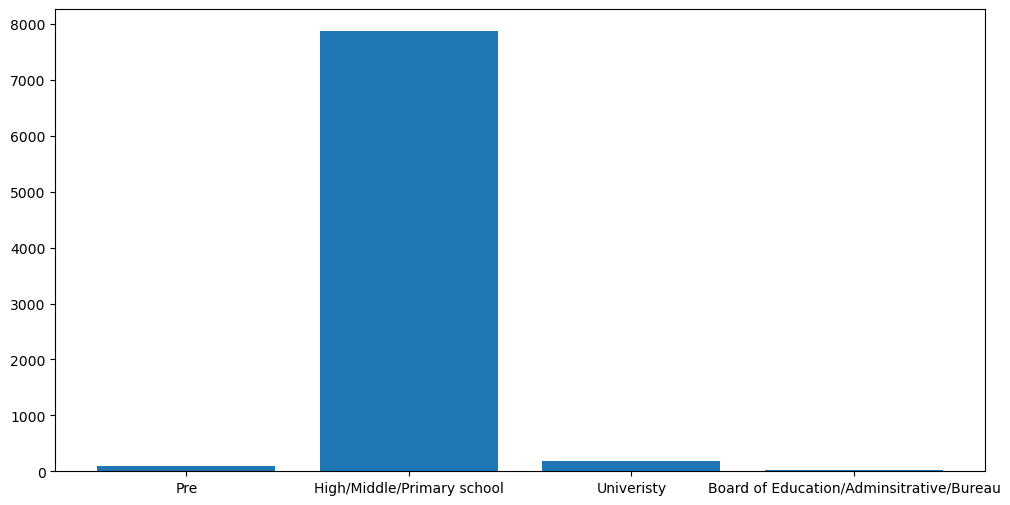

In [79]:
import matplotlib.pyplot as plt 

# count for each class in school_type_dict 
def countSchoolNumber(school_type_arr):
    primary_high_middle_count = 0 
    pre_count = 0 
    university_count = 0 
    admin_count = 0 
    for value in school_type_arr.values():
        match value[0]:
            case 'Primary/Middle/High School/Institute':
                primary_high_middle_count += 1 
            case "Pre-School":
                pre_count += 1 
            case "Univeristy":
                university_count += 1
            case "Board of Education/Adminsitrative/Bureau":
                admin_count += 1
    return pre_count, primary_high_middle_count, university_count, admin_count

# Creats a bar Chart
def barChartPlot(values_count, school_type_count_dic):
    plt.figure(figsize=(12,6))
    plt.bar(school_type_count_dic.keys(), values_count)
    plt.show()
    return


pre_count, primary_high_middle_count, university_count, admin_count = countSchoolNumber(school_type_arr)
print(f"count for pre-schoool: {pre_count}, primary/high/middle : {primary_high_middle_count}, unvieristy: {university_count}, admin:{admin_count}")
values_count = [pre_count, primary_high_middle_count, university_count, admin_count]
keys = ['Pre', 'Primary', "University"]
barChartPlot(values_count, school_type_count)

# Why chose naive bayes?
Importantly naive bayes assume indepedence between each word, alike to our automated labelling function my hope is that the weights words included in the school_type_dict are heavily weighted enabling generlisation whilst also offering precision and accuracy
### Naive Bayes

From bayes rule we find, 
$$
\begin{align*}
  P(class | text) &= \frac{P(text | class)P(class)}{P(text)}  
\end{align*}
$$
Use MLE to find the probaiblity of Class 

$$
\begin{align*}
    c_{MLE} & = argmax P(class | text) \\ 
    &= argmax \frac{P(text | class)P(class)}{P(text)}  \\
    &= argmax P(text | class)P(class) \\ 
    &= argmax P(x1,x2,x3,x3,......|class)P(class) \quad\quad\text{Text = [word1,word2, word3...] }\\ 
    &= argmax P(class)\prod_{i = 1}^n P(x_i | class) \\  
    &= argmax log(P(class)) + \sum_{i = 1}^n log(P(x_i | class) \quad\quad(\text{Naive Bayes assumption of independence})
\end{align*}
$$

Using this we a estimate,

$$
\begin{align*}
\hat{P}(class) &= \frac{\text{Number of times a text = class}}{\text{Number of documents}} \\ 
\hat{P}(word_i | class_i) &= \frac{\text{count(word_i, c_j) +} \alpha}{\sum (count(words, class_i) + \alpha)} = \frac{\text{Fract of times w_i appears in class_j + Laplace Smoothing}}{\text{number of words in class_j + Laplace Smoothing}}
\end{align*}
$$

In [166]:
# Randomly split data into training 
from sklearn.utils import shuffle

def randomShuffleTraingTest(df, percentage_training):
    length_training_set = int(len(df)) * percentage_training

    # shuffle exsiting dataframe
    np.random.seed(1) 
    random_shuffle_df = shuffle(df)
    # Creating new test/train set 
    
    train_set = random_shuffle_df.iloc[:int(length_training_set)]
    train_set['index'] = np.arange(0, len(train_set))
    train_set.set_index('index')
    test_set = random_shuffle_df.iloc[int(length_training_set):]
    test_set['index'] = np.arange(0, len(test_set))
    test_set.set_index('index')
    return train_set, test_set

# Creating new df with new project_school_type # initliased as column zero
train_set, test_set = randomShuffleTraingTest(df, 0.8)
print(len(train_set))
print(len(test_set))

# Find number of classes in test and training set
# Counts Number of Classess in traing data
train_set['project_school_type'].unique()
train_set.head()

6534
1634


/var/folders/0m/tjm8n82117bg4plwvf105j2h0000gn/T/ipykernel_22142/766593329.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['index'] = np.arange(0, len(train_set))
/var/folders/0m/tjm8n82117bg4plwvf105j2h0000gn/T/ipykernel_22142/766593329.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['index'] = np.arange(0, len(test_set))


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,project_school_type,index
4850,4859,25,Q425,JOHN BOWNE HS - QUEENS,SCA CIP RESOA,FY18 RESO A AUDITORIUM UPGRADE,Scope,PNS,PNS,PNS,PNS,0,0.0,0.0,DSF: 0000867243,True,Primary/Middle/High School/Institute,0
6880,6895,16,K455,BOYS & GIRLS HS - BROOKLYN,SCA CIP,REPLACE CHILLERS & COOLING TOWERS,Construction,PNS,PNS,PNS,PNS,3584094,3584094.0,534.0,DSF: 0000829074,False,Primary/Middle/High School/Institute,1
1790,1795,13,K020,P.S. 20 - BROOKLYN,DOE - Skilled Trades,REPLACE (2) SEWAGE EJECTOR PUMPS,Construction,In-Progress,12/23/2016,DOES,NaN,DOES,80309.0,0.0,DSF: 0000846039,True,Primary/Middle/High School/Institute,2
3508,3517,2,M620,UNITY HS - MANHATTAN,Fast Track Projects,CTF - ROOM CONVERSION,Construction,In-Progress,11/04/2014,FTK,NaN,FTK,426575.0,313943.0,DSF: 0000800278,False,Primary/Middle/High School/Institute,3
5281,5290,26,Q332,P.S. 332 - QUEENS,SCA Capacity,NEW SCHOOL,Scope,Complete,02/10/2014,07/23/2014,07/16/2014,1666075,1205005.0,1203154.0,DSF: 0000798205,False,Primary/Middle/High School/Institute,4


In [196]:
import numpy as np

# Posterior Distribution
num_samples = len(test_set)
prob_admin_class = 5 / num_samples
prob_pre_school = 22 / num_samples
prob_primary_high = 1565 / num_samples
prob_uni = 42 / num_samples

posterior_distribution_class_probability = {
    "Board of Education/Adminsitrative/Bureau": prob_admin_class,
    "Pre-School": prob_pre_school,
    "Primary/Middle/High School/Institute": prob_primary_high,
    "Univeristy": prob_uni
}

# Making our vocab from train_set
vocab_word_count = {
    "Pre-School": {},
    "Primary/Middle/High School/Institute": {},
    "Univeristy": {},
    "Board of Education/Adminsitrative/Bureau": {}
}
total_number_of_words = {
    "Pre-School": 0,
    "Primary/Middle/High School/Institute": 0,
    "Univeristy": 0,
    "Board of Education/Adminsitrative/Bureau": 0
}

for index, row in train_set.iterrows():
    # Initialize project school name array and type
    tokens_arr = preprocessText(row['project_school_name'])
    class_value = row['project_school_type']

    # Loop over characters and create a vocab of words
    for token in tokens_arr:
        if token not in vocab_word_count[class_value]:
            vocab_word_count[class_value][token] = 1
        else:
            vocab_word_count[class_value][token] += 1

    # Add number of words to total word count of class
    total_number_of_words[class_value] += len(tokens_arr)

# Loop over test data, Tokenize each test sample, then find maximum likelihood estimator for each estimate
laplace_smooth = 1
arr_predict = []
for index, row in test_set.iterrows():
    # Convert to tokens
    tokens_arr = preprocessText(row['project_school_name'])
    
    # Count holder
    arg_sum_dict = {key: 0 for key in vocab_word_count.keys()}
    
    # Go through each class of project_school_type
    for key in vocab_word_count.keys():
        # Compute log(posterior(class))
        log_class_prob = np.log(posterior_distribution_class_probability[key])
        sum_class = log_class_prob
        
        for token in tokens_arr:
            # Find probability of token in this class
            number_of_time_token_in_vocab = vocab_word_count[key].get(token, 0) + laplace_smooth
            probaiblity_of_token = number_of_time_token_in_vocab / (total_number_of_words[key] + laplace_smooth * len(vocab_word_count[key]))
            sum_class += np.log(probaiblity_of_token)
            
        # Add sum to dictionary
        arg_sum_dict[key] = sum_class

    # Find the max probability
    max_value_label = max(arg_sum_dict, key=arg_sum_dict.get)

    arr_predict.append(max_value_label)

#print(arr_predict)


In [203]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(arr_predict, test_set['project_school_type'])
print(classification_report(arr_predict, test_set['project_school_type']))

                                          precision    recall  f1-score   support

Board of Education/Adminsitrative/Bureau       1.00      0.02      0.04       254
                              Pre-School       0.95      0.95      0.95        22
    Primary/Middle/High School/Institute       0.83      1.00      0.90      1293
                              Univeristy       0.90      0.58      0.71        65

                                accuracy                           0.83      1634
                               macro avg       0.92      0.64      0.65      1634
                            weighted avg       0.86      0.83      0.76      1634



# Problem: Unbalanced Class
Cleary, there is a unbalcne between each class in our features, thus traingin a model can lead to overclassification of high/middle/primary school 

We we will do is check resutls of training a naive bayes algorithm with fixing imbalacned class then check recall and precision then fix imbalance then check perofrmacne of naive bayes

## Solutions to unbalanced class


### Oversampling minority class - SMOTE (Synethetic Minority Oversmapliong tehcnique)
Since there is allot of

In [ ]:
print(train_set.groupby('project_school_type')['Unnamed: 0'].nunique())

# Puting Weight in the minority class
weight_minority_class_pre_school = 6307 / 68 
weight_minority_class_university = 6307 / 141 
weight_minority_class_admin = 6307 / 18


Building Naive Bayes classifier with minority class